In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y_train, X_train, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [45]:
from implementations import preprocess
tX_train, ty_train, tX_test, ty_test, cont_features = preprocess(X_train, y_train, X_test, imputable_th=0.3, encodable_min_th=0.3, encodable_max_th=0.7)

In [32]:
tX_train

array([[ 1.        ,  0.06833197,  0.40768027, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.55250482,  0.54013641, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  3.19515553,  1.09655998, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 1.        ,  0.31931645, -0.13086367, ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        , -0.84532397, -0.30297338, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.66533608, -0.25352276, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
tX_train.shape, tX_test.shape

((250000, 24), (568238, 24))

In [34]:
from implementations import logistic_regression_cv
weights, loss, lambda_, degree, accuracy, f1 = logistic_regression_cv(ty_train, tX_train, max_iters=200, cont_features=cont_features, verbose=False)

Best Accuracy : 72.93650000000001% reached at epoch 199
Best Accuracy : 73.335% reached at epoch 199
Best Accuracy : 72.70299999999999% reached at epoch 199
Best Accuracy : 72.59299999999999% reached at epoch 199
Best Accuracy : 73.251% reached at epoch 199
Best Accuracy : 72.928% reached at epoch 199
Best Accuracy : 73.31450000000001% reached at epoch 198
Best Accuracy : 72.70100000000001% reached at epoch 199
Best Accuracy : 72.613% reached at epoch 199
Best Accuracy : 73.24249999999999% reached at epoch 199
Best Accuracy : 72.963% reached at epoch 198
Best Accuracy : 73.1585% reached at epoch 198
Best Accuracy : 72.65% reached at epoch 199
Best Accuracy : 72.696% reached at epoch 198
Best Accuracy : 73.1405% reached at epoch 198
Best Accuracy : 71.6365% reached at epoch 95
Best Accuracy : 71.646% reached at epoch 77
Best Accuracy : 71.334% reached at epoch 174
Best Accuracy : 71.4155% reached at epoch 170
Best Accuracy : 71.572% reached at epoch 99
Best Accuracy : 69.462% reached at

In [35]:
weights, loss, lambda_, degree, accuracy, f1

(array([[ 0.23872524],
        [-0.57155435],
        [-0.00990512],
        [ 0.38146168],
        [ 0.80410591],
        [-0.02636859],
        [ 0.20541366],
        [-0.29468863],
        [ 0.2389753 ],
        [ 0.67638841],
        [-0.0524618 ],
        [ 0.01153473],
        [ 0.29985158],
        [ 0.0679841 ],
        [ 0.00284688],
        [ 0.08168035],
        [ 0.02530589],
        [ 0.20573885],
        [ 0.00455425],
        [-0.107733  ],
        [ 0.22853251],
        [-0.21147431],
        [ 0.09227908],
        [-0.50184131],
        [ 0.0614066 ],
        [-0.33355662],
        [ 0.02385781],
        [ 0.01415927],
        [ 0.00574094],
        [ 0.26353548],
        [-0.06885229],
        [-0.09601186],
        [-0.03304313],
        [-0.01071263],
        [-0.23095955],
        [-0.05340245],
        [ 0.00312328],
        [ 0.02932327],
        [-0.10396382],
        [-0.12158887],
        [-0.05631481],
        [-0.29968226]]),
 0.4657866117913868,
 0.001,
 2,

Iteration 0/500
Accuracy = 34.318799999999996%
Loss = 5.256219006861961


Iteration 10/500
Accuracy = 60.977599999999995%
Loss = 1.3556130430289726


Iteration 20/500
Accuracy = 66.6364%
Loss = 0.7146489905288386


Iteration 30/500
Accuracy = 69.2048%
Loss = 0.6174073431827


Iteration 40/500
Accuracy = 71.1688%
Loss = 0.5695721260713025


Iteration 50/500
Accuracy = 72.86240000000001%
Loss = 0.540001594431089


Iteration 60/500
Accuracy = 74.1148%
Loss = 0.5204350926706494


Iteration 70/500
Accuracy = 75.1024%
Loss = 0.506996866409422


Iteration 80/500
Accuracy = 75.87559999999999%
Loss = 0.49753762151094827


Iteration 90/500
Accuracy = 76.42999999999999%
Loss = 0.4906998332208967


Iteration 100/500
Accuracy = 76.80160000000001%
Loss = 0.4856297105563596


Iteration 110/500
Accuracy = 77.1132%
Loss = 0.48178422373616286


Iteration 120/500
Accuracy = 77.404%
Loss = 0.47880549124432953


Iteration 130/500
Accuracy = 77.58040000000001%
Loss = 0.4764532906805754


Iteration 140/500
A

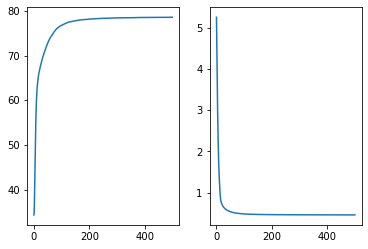

In [44]:
from implementations import reg_logistic_regression, build_poly
tX_train_poly = build_poly(tX_train, degree=degree, cont_features=cont_features)
weights, loss = reg_logistic_regression(ty_train, tX_train_poly, max_iters=500, lambda_=lambda_, verbose=True)

In [36]:
tX_test.shape

(568238, 24)

In [46]:
from implementations import build_poly
tX_test_poly = build_poly(tX_test, degree, cont_features)

In [47]:
tX_test_poly.shape

(568238, 42)

In [40]:
from datetime import datetime
from implementations import predict_log_reg
method = 'reg_logistic_regression'
time = datetime.now().strftime('%Y%m%dH%H%M%S')
OUTPUT_PATH = f'submissions/submission_{method}_{time}' # TODO: fill in desired name of output file for submission
y_pred = predict_log_reg(weights, tX_test_poly)
y_pred[np.where(y_pred == 0)] = -1
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)